In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from scipy.stats import ttest_ind


In [100]:
mdata = pd.read_csv('mdata.csv')
mdata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chips compny seasalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,smiths chips thinly s/cream&onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget


1- Sales ($) per Customer Segment

unstack() - Transforms the result from a Series with a MultiIndex to a DataFrame:

'LIFESTAGE' becomes the row index

'PREMIUM_CUSTOMER' becomes the column headers

Values show the total purchase for each segment combination




                                         TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget             8.689657
YOUNG SINGLES/COUPLES  Mainstream         8.175494
RETIREES               Mainstream         8.041809
YOUNG FAMILIES         Budget             7.185883
OLDER SINGLES/COUPLES  Budget             7.081497
                       Mainstream         6.905054
                       Premium            6.843512
RETIREES               Budget             5.867361
OLDER FAMILIES         Mainstream         5.340945
RETIREES               Premium            5.057488
YOUNG FAMILIES         Mainstream         4.782812
MIDAGE SINGLES/COUPLES Mainstream         4.693956
YOUNG FAMILIES         Premium            4.352574
OLDER FAMILIES         Premium            4.168155
YOUNG SINGLES/COUPLES  Budget             3.164348
MIDAGE SINGLES/COUPLES Premium            3.015983
YOUNG SINGLES/COUPLES  Premium            2.163349
MIDAGE SINGLES/COUPLES Budget  

<Axes: xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

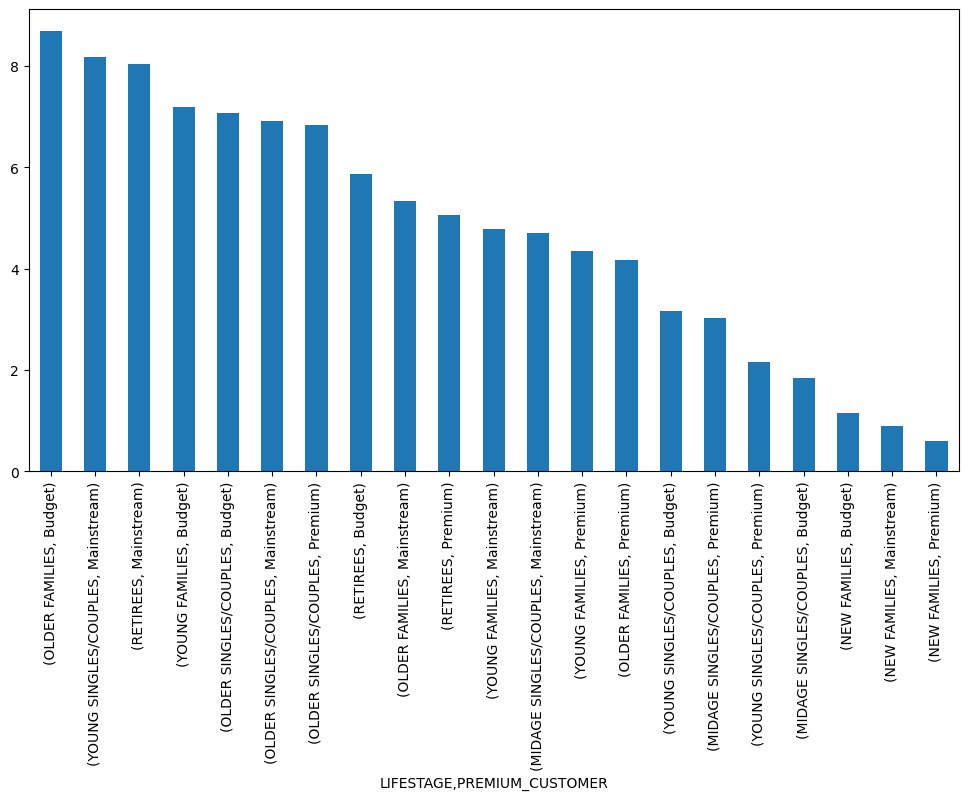

In [101]:
# Here we dont use unstack() to see the sorted list
sales_by_group = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
grand_total = mdata['TOT_SALES'].sum()
sales_percent0 = sales_by_group / grand_total * 100
print(pd.DataFrame(sales_percent0.sort_values(ascending=False)))
sales_percent0.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))


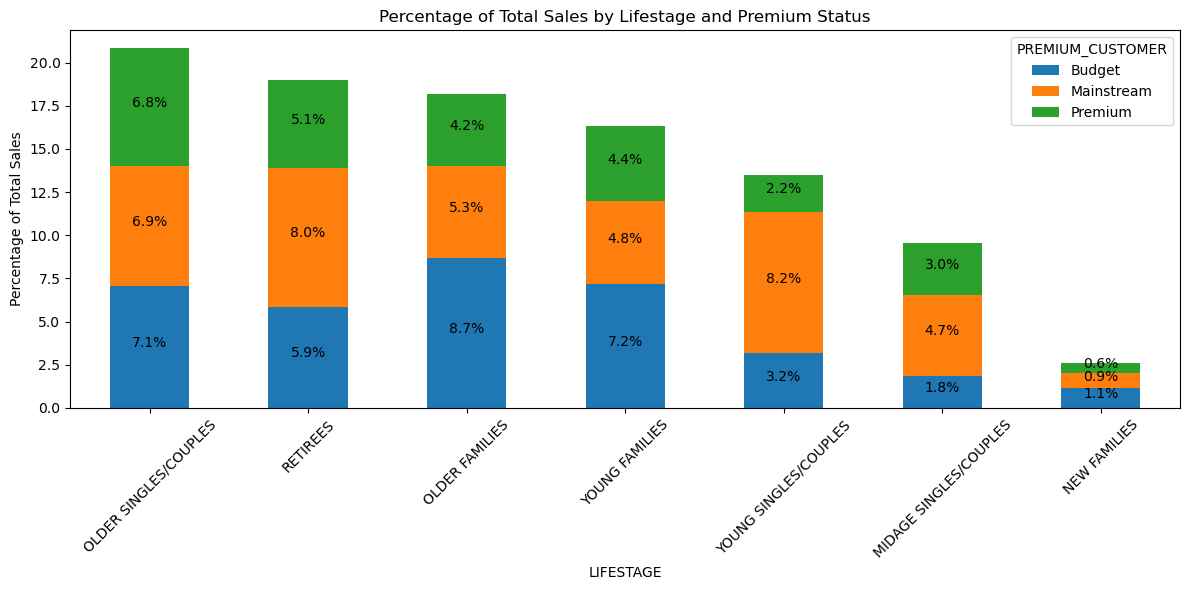

In [102]:

# Here we use unstack() to see the histogram for each combination of LIFESTAGE and PREMIUM_CUSTOMER



# Calculate total sales for each combination
sales_by_group = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()


# Reorder based on total sales for each lifestage
sorted_lifestages = mdata.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).index
sales_by_group = sales_by_group.reindex(sorted_lifestages)

# Plot

grand_total = mdata['TOT_SALES'].sum()
sales_percent = sales_by_group / grand_total * 100


ax = sales_percent.plot(kind='bar', stacked=True, figsize=(12,6))

# Add percentage labels
for i in range(len(sales_percent)):
    y_bottom = 0
    for j in range(len(sales_percent.columns)):
        value = sales_percent.iloc[i, j]
        if value > 0:
            ax.text(i, y_bottom + value/2, f'{value:.1f}%', ha='center')
        y_bottom += value

plt.title("Percentage of Total Sales by Lifestage and Premium Status")
plt.ylabel("Percentage of Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2- Number of customers per Customer Segment

                                         LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream             11.105812
RETIREES               Mainstream              8.918877
OLDER SINGLES/COUPLES  Mainstream              6.814707
                       Budget                  6.802082
                       Premium                 6.567817
OLDER FAMILIES         Budget                  6.468220
RETIREES               Budget                  6.151192
YOUNG FAMILIES         Budget                  5.545191
RETIREES               Premium                 5.347399
YOUNG SINGLES/COUPLES  Budget                  5.115940
MIDAGE SINGLES/COUPLES Mainstream              4.626369
OLDER FAMILIES         Mainstream              3.910952
YOUNG FAMILIES         Mainstream              3.766465
YOUNG SINGLES/COUPLES  Premium                 3.478895
YOUNG FAMILIES         Premium                 3.363867
MIDAGE SINGLES/COUPLES Premium                 3

<Axes: xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

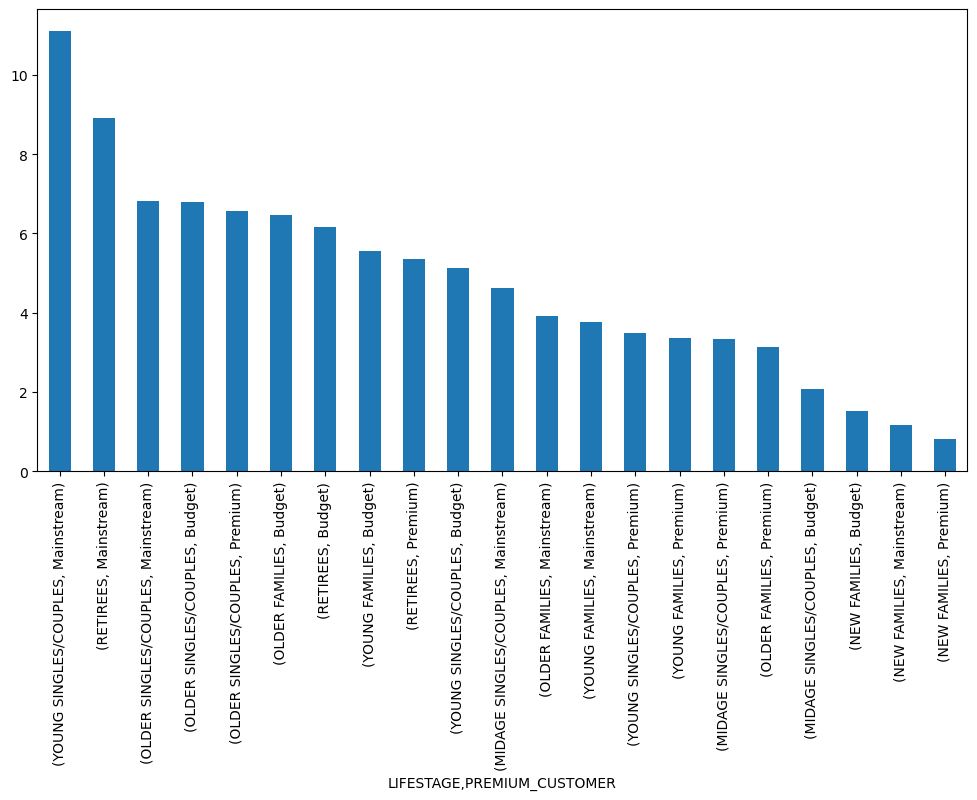

In [103]:
# Here we dont use unstack() to see the sorted list
customers_count = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
total_unique_customers = mdata['LYLTY_CARD_NBR'].nunique()
customers_count_percent0 = customers_count / total_unique_customers * 100
print(pd.DataFrame(customers_count_percent0.sort_values(ascending=False)))
customers_count_percent0.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

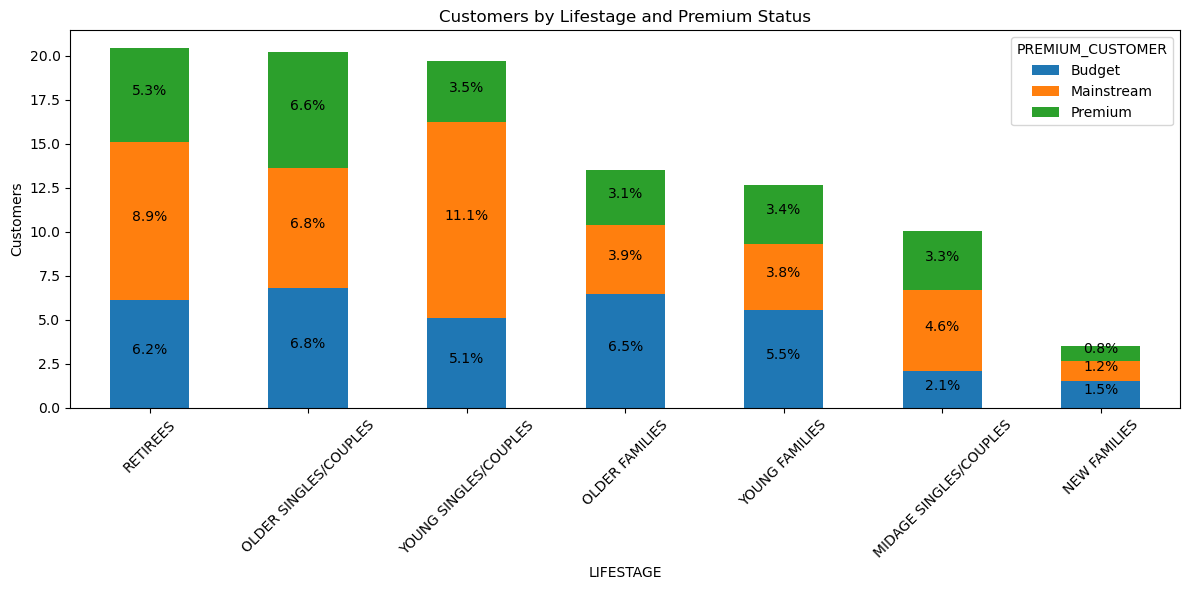

In [104]:
# Here we use unstack() to see the histogram for each combination of LIFESTAGE and PREMIUM_CUSTOMER

# Calculate number of unique customers for each combination
customers_count = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()


# Reorder based on number of unique customers
sorted_lifestages = mdata.groupby(['LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False).index
customers_count = customers_count.reindex(sorted_lifestages)

# Plot

total_unique_customers = mdata['LYLTY_CARD_NBR'].nunique()
customers_count_percent = customers_count / total_unique_customers * 100


ax = customers_count_percent.plot(kind='bar', stacked=True, figsize=(12,6))

# Add number labels
for i in range(len(customers_count_percent)):
    y_bottom = 0
    for j in range(len(customers_count_percent.columns)):
        value = customers_count_percent.iloc[i, j]
        if value > 0:
            ax.text(i, y_bottom + value/2, f'{value:.1f}%', ha='center')
        y_bottom += value

plt.title("Customers by Lifestage and Premium Status")
plt.ylabel("Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

unstack() - Transforms the result from a Series with a MultiIndex to a DataFrame:
'LIFESTAGE' becomes the row index
'PREMIUM_CUSTOMER' becomes the column headers
Values show the average units per customer for each segment combination

3- Average units purchased per Customer Segment

                                                0
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream        9.255380
                       Budget            9.076773
                       Premium           9.071717
YOUNG FAMILIES         Budget            8.722995
                       Premium           8.716013
                       Mainstream        8.638361
OLDER SINGLES/COUPLES  Budget            6.781398
                       Premium           6.769543
                       Mainstream        6.712021
MIDAGE SINGLES/COUPLES Mainstream        6.432080
RETIREES               Budget            6.141847
                       Premium           6.103358
MIDAGE SINGLES/COUPLES Premium           6.078514
                       Budget            6.026459
RETIREES               Mainstream        5.925920
NEW FAMILIES           Mainstream        4.891566
                       Budget            4.821527
                       Premium           4.815652


C:\Users\Amin\AppData\Local\Temp\ipykernel_19764\4290519704.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_units0 = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique())


<Axes: xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

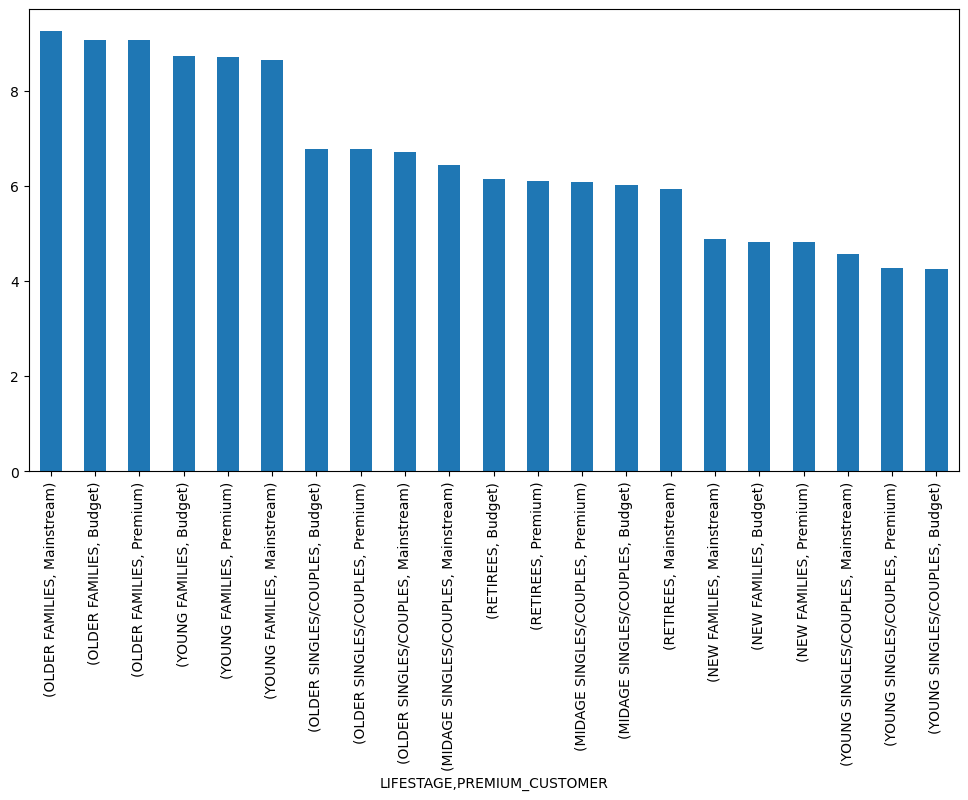

In [105]:
# Here we dont use unstack() to see the sorted list
avg_units0 = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique())
print(pd.DataFrame(avg_units0.sort_values(ascending=False)))
avg_units0.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

C:\Users\Amin\AppData\Local\Temp\ipykernel_19764\1537118412.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_units = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()).unstack()


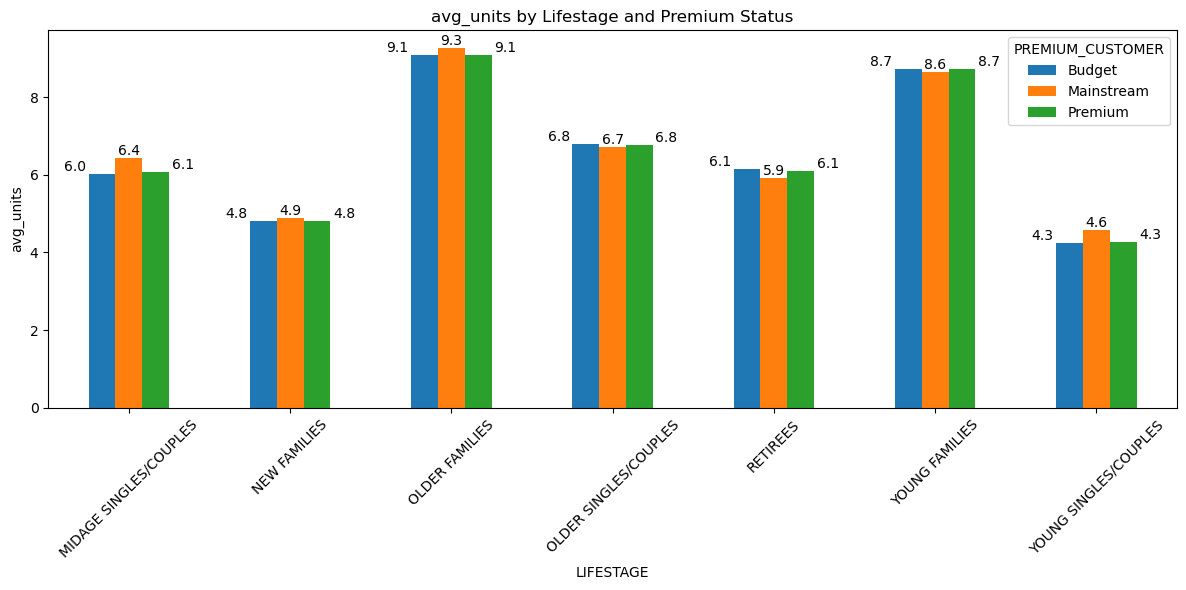

In [106]:
# Here we use unstack() to see the histogram for each combination of LIFESTAGE and PREMIUM_CUSTOMER

# Calculate avg_units for each combination
avg_units = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()).unstack()


# Plot

ax = avg_units.plot(kind='bar', figsize=(12,6))

# Add value labels on top of each bar
for i in range(len(avg_units)):
    for j in range(len(avg_units.columns)):
        value = avg_units.iloc[i, j]
        if not pd.isna(value):  # Check if the value is not NaN
            ax.text(i + (j-len(avg_units.columns)/2+0.5)/len(avg_units.columns), 
                   value, 
                   f'{value:.1f}', 
                   ha='center', 
                   va='bottom')
            
plt.title("avg_units by Lifestage and Premium Status")
plt.ylabel("avg_units")
plt.xticks(rotation=45)
plt.tight_layout()

4- Average price purchased per Customer Segment

                                            price
LIFESTAGE              PREMIUM_CUSTOMER          
YOUNG SINGLES/COUPLES  Mainstream        4.065642
MIDAGE SINGLES/COUPLES Mainstream        3.994241
RETIREES               Budget            3.924404
                       Premium           3.920942
NEW FAMILIES           Budget            3.917688
                       Mainstream        3.916133
OLDER SINGLES/COUPLES  Premium           3.893182
                       Budget            3.882096
NEW FAMILIES           Premium           3.872110
RETIREES               Mainstream        3.844294
OLDER SINGLES/COUPLES  Mainstream        3.814665
MIDAGE SINGLES/COUPLES Premium           3.770698
YOUNG FAMILIES         Premium           3.762150
                       Budget            3.760737
OLDER FAMILIES         Budget            3.745340
MIDAGE SINGLES/COUPLES Budget            3.743328
OLDER FAMILIES         Mainstream        3.737077
YOUNG FAMILIES         Mainstream        3.724533


<Axes: xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

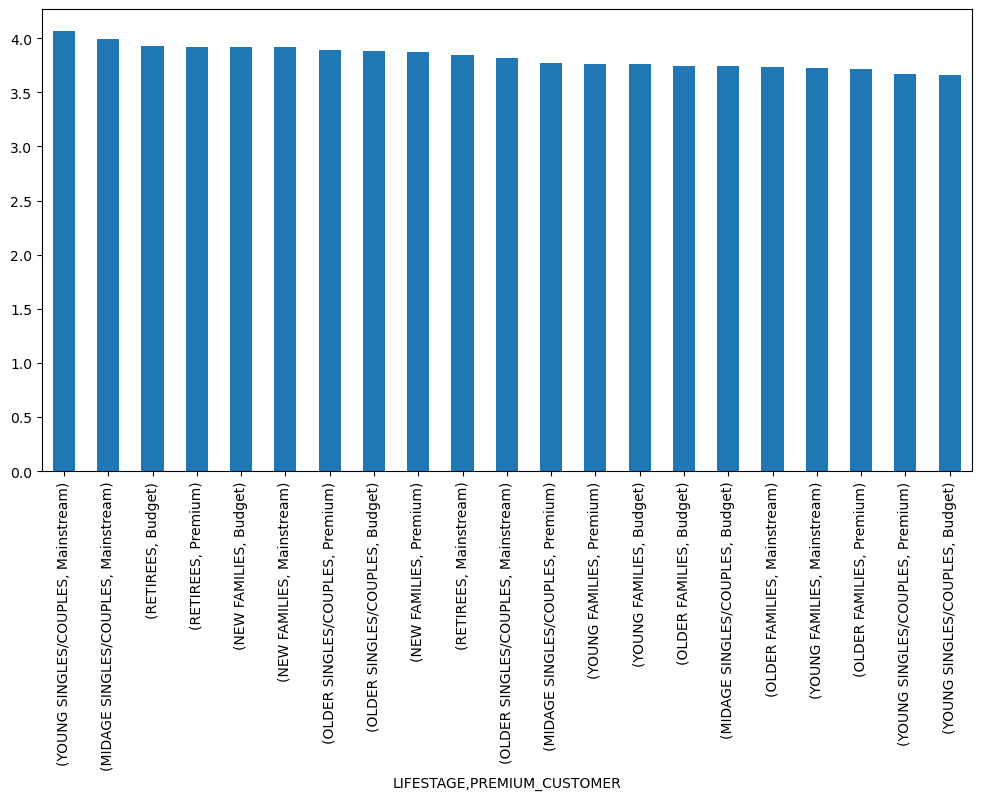

In [107]:
# Here we dont use unstack() to see the sorted list
mdata['price'] = mdata['TOT_SALES'] / mdata['PROD_QTY']
avg_price0 = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['price'].mean()
print(pd.DataFrame(avg_price0.sort_values(ascending=False)))
avg_price0.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

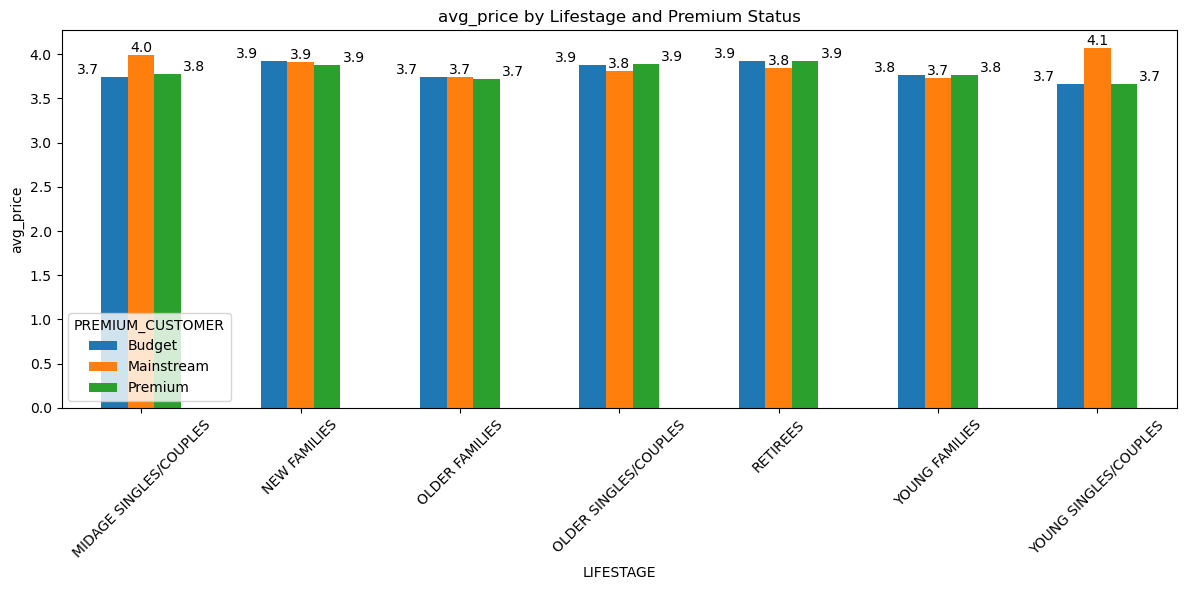

In [108]:
# Here we use unstack() to see the histogram for each combination of LIFESTAGE and PREMIUM_CUSTOMER

# Calculate avg_price for each combination

mdata['price'] = mdata['TOT_SALES'] / mdata['PROD_QTY']
avg_price = mdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['price'].mean().unstack()


# Plot

ax = avg_price.plot(kind='bar', figsize=(12,6))

# Add value labels on top of each bar
for i in range(len(avg_price)):
    for j in range(len(avg_price.columns)):
        value = avg_price.iloc[i, j]
        if not pd.isna(value):  # Check if the value is not NaN
            ax.text(i + (j-len(avg_price.columns)/2+0.5)/len(avg_price.columns), 
                   value, 
                   f'{value:.1f}', 
                   ha='center', 
                   va='bottom')
            
plt.title("avg_price by Lifestage and Premium Status")
plt.ylabel("avg_price")
plt.xticks(rotation=45)
plt.tight_layout()

4-1- T-test: Mainstream vs Others (Young & Midage Singles/Couples)
As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [109]:
mainstream = mdata[(mdata['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & 
                   (mdata['PREMIUM_CUSTOMER'] == "Mainstream")]['price']
others = mdata[(mdata['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & 
              (mdata['PREMIUM_CUSTOMER'] != "Mainstream")]['price']
t_stat, p_value = ttest_ind(mainstream, others, equal_var=False)
print(f"T-test result: t-stat = {t_stat:.3f}, p-value = {p_value:.3f}")


T-test result: t-stat = 37.624, p-value = 0.000


The t-test results in a p-value < 2.2e-16, i.e. the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples.

In [116]:
#top 5 combinations of total sales
j1= pd.DataFrame(sales_percent0.sort_values(ascending=False).head(10)).to_json()


#top 5 combinations of total unique customers
j2= pd.DataFrame(customers_count_percent0.sort_values(ascending=False).head(10)).to_json()


#top 5 combinations of avg_units
j3= pd.DataFrame(avg_units0.sort_values(ascending=False).head(10)).to_json()

#top 5 combinations of avg_price
j4= pd.DataFrame(avg_price0.sort_values(ascending=False).head(10)).to_json()

print('top 5 combinations of total sales')
print(j1)

print('top 5 combinations of total unique customers')
print(j2)

print('top 5 combinations of avg_units')
print(j3)

print('top 5 combinations of avg_price')
print(j4)


top 5 combinations of total sales
{"TOT_SALES":{"('OLDER FAMILIES', 'Budget')":8.6896569795,"('YOUNG SINGLES\/COUPLES', 'Mainstream')":8.1754943018,"('RETIREES', 'Mainstream')":8.0418094019,"('YOUNG FAMILIES', 'Budget')":7.1858825865,"('OLDER SINGLES\/COUPLES', 'Budget')":7.0814967413,"('OLDER SINGLES\/COUPLES', 'Mainstream')":6.905054278,"('OLDER SINGLES\/COUPLES', 'Premium')":6.8435118604,"('RETIREES', 'Budget')":5.8673614238,"('OLDER FAMILIES', 'Mainstream')":5.3409451047,"('RETIREES', 'Premium')":5.0574882462}}
top 5 combinations of total unique customers
{"LYLTY_CARD_NBR":{"('YOUNG SINGLES\/COUPLES', 'Mainstream')":11.1058117188,"('RETIREES', 'Mainstream')":8.9188772146,"('OLDER SINGLES\/COUPLES', 'Mainstream')":6.8147067488,"('OLDER SINGLES\/COUPLES', 'Budget')":6.802081726,"('OLDER SINGLES\/COUPLES', 'Premium')":6.5678174141,"('OLDER FAMILIES', 'Budget')":6.4682200121,"('RETIREES', 'Budget')":6.1511916619,"('YOUNG FAMILIES', 'Budget')":5.5451905677,"('RETIREES', 'Premium')":5.34

## Final Customer segment analysis:
Marketing Strategies by Segment

1- Young Singles/Couples (Mainstream):
- Premium product promotions with higher price points
- Digital-first loyalty program rewarding visit frequency
- Convenient meal solutions for two with premium positioning

2- Older Families (Budget):
- Bulk purchase discounts on family essentials
- Volume-based loyalty rewards to maintain high sales
- Family meal deals emphasizing value without sacrificing quality

3- Retirees (All Tiers):
- Weekday shopping incentives with personalized service
- Health-focused product promotions with appropriate sizing
- Community-building events to strengthen loyalty

4- Cross-Segment Tactics:
- Personalized recommendations based on purchase history
- Tiered private label offerings across price points
- Mobile app with customized promotions by segment
- Strategic store layouts to encourage cross-category purchases
- Seasonal campaigns tailored to life stage needs

## Affinity Analysis: Brand and Pack Size

5-1- We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at "Mainstream - young singles/couples". For instance, let’s find out if they tend to
buy a particular brand of chips.

In [ ]:
segment = mdata[(mdata['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
                   (mdata['PREMIUM_CUSTOMER'] == "Mainstream")]
rest = mdata[~((mdata['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
              (mdata['PREMIUM_CUSTOMER'] == "Mainstream"))]

segment['BRAND'].value_counts(normalize=True).sort_index().index.equals(rest['BRAND'].value_counts(normalize=True).sort_index().index)


print(segment['BRAND'].value_counts(normalize=True).sort_index())
print(rest['BRAND'].value_counts(normalize=True).sort_index())



BRAND
BURGER        0.003172
CCS           0.011359
CHEETOS       0.008494
CHEEZELS      0.017704
COBS          0.044208
DORITOS       0.121725
FRENCH        0.003991
GRNWVES       0.033054
INFUZIONS     0.063958
KETTLE        0.196684
NATURAL       0.020160
PRINGLES      0.118451
RRD           0.044771
SMITHS        0.098291
SUNBITES      0.006549
THINS         0.059660
TOSTITOS      0.045538
TWISTIES      0.046050
TYRRELLS      0.031672
WOOLWORTHS    0.024509
Name: proportion, dtype: float64
BRAND
BURGER        0.006611
CCS           0.019054
CHEETOS       0.012153
CHEEZELS      0.018737
COBS          0.038861
DORITOS       0.100552
FRENCH        0.005898
GRNWVES       0.031224
INFUZIONS     0.057004
KETTLE        0.164809
NATURAL       0.031141
PRINGLES      0.100297
RRD           0.067985
SMITHS        0.125143
SUNBITES      0.012676
THINS         0.056819
TOSTITOS      0.037769
TWISTIES      0.037650
TYRRELLS      0.025630
WOOLWORTHS    0.049988
Name: proportion, dtype: float64


In [ ]:

brand_affinity = (segment['BRAND'].value_counts(normalize=True).sort_index() / rest['BRAND'].value_counts(normalize=True).sort_index())
brand_affinity.sort_values(ascending=False)

BRAND
TYRRELLS      1.235751
TWISTIES      1.223096
DORITOS       1.210572
TOSTITOS      1.205700
KETTLE        1.193406
PRINGLES      1.181003
COBS          1.137600
INFUZIONS     1.122003
GRNWVES       1.058592
THINS         1.050009
CHEEZELS      0.944843
SMITHS        0.785429
CHEETOS       0.698922
FRENCH        0.676670
RRD           0.658536
NATURAL       0.647377
CCS           0.596146
SUNBITES      0.516660
WOOLWORTHS    0.490297
BURGER        0.479854
Name: proportion, dtype: float64

We can see that :

• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population

• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population


5-2- Let’s also find out our target segment tends to buy which packs of chips.

In [ ]:
print(segment['PACK_SIZE'].value_counts(normalize=True).sort_index())
print(rest['PACK_SIZE'].value_counts(normalize=True).sort_index())

PACK_SIZE
70.0     0.003223
90.0     0.006549
110.0    0.104943
125.0    0.003019
134.0    0.118451
135.0    0.014838
150.0    0.157593
160.0    0.006549
165.0    0.056386
170.0    0.080587
175.0    0.255679
180.0    0.003582
190.0    0.007573
200.0    0.009159
210.0    0.029472
220.0    0.003172
250.0    0.014327
270.0    0.031723
330.0    0.061144
380.0    0.032030
Name: proportion, dtype: float64
PACK_SIZE
70.0     0.006356
90.0     0.012676
110.0    0.089509
125.0    0.006140
134.0    0.100297
135.0    0.013059
150.0    0.163396
160.0    0.012509
165.0    0.062479
170.0    0.081023
175.0    0.270220
180.0    0.006153
190.0    0.012531
200.0    0.018900
210.0    0.025071
220.0    0.006611
250.0    0.012716
270.0    0.024934
330.0    0.049935
380.0    0.025485
Name: proportion, dtype: float64


In [ ]:
PACK_affinity = (segment['PACK_SIZE'].value_counts(normalize=True).sort_index() / rest['PACK_SIZE'].value_counts(normalize=True).sort_index())
PACK_affinity.sort_values(ascending=False).head()

PACK_SIZE
270.0    1.272269
380.0    1.256849
330.0    1.224477
134.0    1.181003
210.0    1.175546
Name: proportion, dtype: float64

It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared
to the rest of the population but let’s dive into what brands sell this pack size.

6- Conclusion

Let’s recap what we’ve found:
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees
is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance
by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
we can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.